# The Best Neighborhood according to **Vibe Check**

Metric: Trees, Water, 

We picked a data set that describes the trees in a neighborhood and used it to calaulate how many trees a neighborhood had and then compared that to how many water sources it had along with the amout of        the neighborhood had. After comparing all three data sets which ever neighborhood had the highest amount in each category would be our idea of the best neighborhood. 

We picked to use Trees Water and        . 

In [15]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
pgh_waterfeatures = pd.read_csv("https://data.wprdc.org/datastore/dump/513290a6-2bac-4e41-8029-354cbda6a7b7")
                           
pgh_waterfeatures.head()

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408433,-80.028327
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440445,-79.984061
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454382,-80.008277
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450866,-80.001959
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450995,-80.001498


In [5]:
pgh_trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")
                           
pgh_trees.head()

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


In [8]:
pgh_trees.groupby('neighborhood')['id'].count().sort_values(ascending=True)

neighborhood
Hays                            1
South Shore                     2
Glen Hazel                      2
Esplen                          3
Arlington Heights               5
Northview Heights               6
East Carnegie                   8
St. Clair                      12
Mt. Oliver                     13
Ridgemont                      31
Fairywood                      31
Chartiers City                 37
Spring Garden                  55
West Oakland                   78
Summer Hill                    79
Allentown                      84
Fineview                       90
Oakwood                        92
Homewood West                  92
Bon Air                        92
California-Kirkbride           94
Duquesne Heights              101
Arlington                     107
Spring Hill-City View         114
Windgap                       117
West End                      131
Beltzhoover                   170
Elliott                       171
Upper Hill                    179
N

In [12]:
def filter_less_than(x, threshold):
    if len(x) <= threshold:
        return False
    else:
        return True
    
tree_amount = pgh_trees.groupby("neighborhood").filter(filter_less_than, 
                                                     threshold=700)

simple_treedisplay= tree_amount.groupby("neighborhood")["id"].count().sort_values(ascending=True)

simple_treedisplay

neighborhood
Manchester                    707
Central Lawrenceville         713
Greenfield                    745
Carrick                       772
North Oakland                 775
Brookline                     853
Allegheny Center              867
Mount Washington              874
Brighton Heights              910
Central Business District    1002
Perry North                  1007
Point Breeze                 1314
East Liberty                 1366
Bloomfield                   1436
Shadyside                    1558
South Side Flats             1693
Squirrel Hill North          2079
Highland Park                2941
Squirrel Hill South          5073
Name: id, dtype: int64

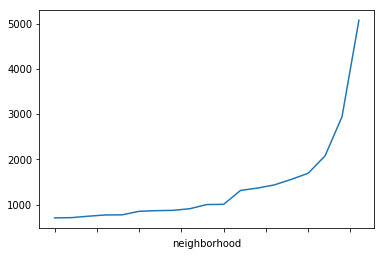

In [16]:
simple_treedisplay.plot()